In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

**Analisis previo**

* Usamos la hipótesis de que la propagación del dengue puede seguir diferentes patrones entre las dos ciudades, entonces dividimos el conjunto de datos y visualizamos los datos de forma separada para cada ciudad. Elegimos la ciudad de Iquitos.

* Notemos que no tenemos ningun valor NaN en las columnas que nos interesan.

In [10]:
df1 = pd.read_csv("/content/drive/MyDrive/Organizacion de Datos/Trabajos Practicos/dengue_features_train.csv", usecols = ["city", "year", "weekofyear", "week_start_date"])
df2 = pd.read_csv("/content/drive/MyDrive/Organizacion de Datos/Trabajos Practicos/dengue_labels_train.csv")

df1["mes"] = df1["week_start_date"].map(lambda x: x.split("-")[1])
df1 = df1.drop(columns=["week_start_date"])

df_iq_boxplot = pd.merge(df1, df2, how="right")

df_iq_boxplot.drop(df_iq_boxplot[df_iq_boxplot["city"] != "iq"].index, inplace=True)
df_iq_boxplot['rango'] = pd.cut(df_iq_boxplot["year"], bins=[1999, 2005, 2010], labels=['2000-2005', '2006-2010'])

Text(0.5, 1.0, 'Distribucion de la cantidad de casos en Iquitos (2000-2010)')

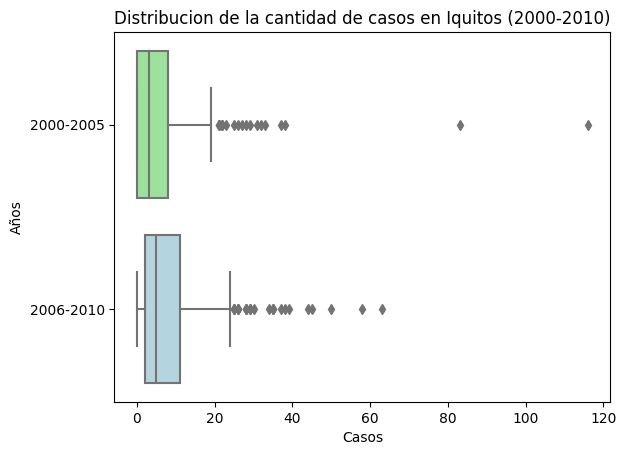

In [11]:
sns.boxplot( data=df_iq_boxplot, x='total_cases', y='rango', palette=["lightgreen", "lightblue"])
plt.xlabel('Casos')
plt.ylabel('Años')
plt.title('Distribucion de la cantidad de casos en Iquitos (2000-2010)')